In [66]:
# Querying DBpedia for the SPARQL queries
# DBpedia endpoint http://dbpedia.org/sparql / # https://dbpedia.org/snorql/


# importing packages
import pandas as pd
from SPARQLWrapper import SPARQLWrapper, JSON, N3
#import lxml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from networkx import Graph as NXGraph
from rdflib import Graph as RDFGraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
import statistics
import collections


!python --version
print('------------')
print("Pandas " + pd.__version__)
print("Numpy " + np.__version__)
print("Seaborn " + sns.__version__)
print("Networkx " + nx.__version__)

Python 3.7.6
------------
Pandas 1.3.4
Numpy 1.18.1
Seaborn 0.11.2
Networkx 2.4


In [6]:
def get_music_genre():
    sparql = SPARQLWrapper("http://dbpedia.org/sparql") # SPARQL endpoint
    sparql.setReturnFormat(JSON)
    sparql.setQuery('''
        SELECT ?cat 
        WHERE {
                ?cat a dbo:MusicGenre .
        }
    ''')  # insert query as a literal string

    qres = sparql.query().convert()
    return qres

In [8]:
get_music_genre()

{'head': {'link': [], 'vars': ['cat']},
 'results': {'distinct': False,
  'ordered': True,
  'bindings': [{'cat': {'type': 'uri',
     'value': 'http://dbpedia.org/resource/3D_modeler'}},
   {'cat': {'type': 'uri',
     'value': 'http://dbpedia.org/resource/Application_launcher'}},
   {'cat': {'type': 'uri',
     'value': 'http://dbpedia.org/resource/California_Soul'}},
   {'cat': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Citcom'}},
   {'cat': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Dark'}},
   {'cat': {'type': 'uri',
     'value': 'http://dbpedia.org/resource/Dictator_novel'}},
   {'cat': {'type': 'uri',
     'value': 'http://dbpedia.org/resource/Elizabeth_Nourse'}},
   {'cat': {'type': 'uri',
     'value': 'http://dbpedia.org/resource/Garage_punk_(fusion_genre)'}},
   {'cat': {'type': 'uri',
     'value': 'http://dbpedia.org/resource/Goldwork_(embroidery)'}},
   {'cat': {'type': 'uri',
     'value': 'http://dbpedia.org/resource/Internet_of_things'}},
   {'ca

In [4]:
sparql = SPARQLWrapper("http://dbpedia.org/sparql") # SPARQL endpoint
sparql.setReturnFormat(JSON)
sparql.setQuery('''
    SELECT ?obj WHERE {
        dbr:Barack_Obama rdfs:label ?obj .
    }
    ''')  # insert query as a literal string
    
qres = sparql.query().convert()
print (qres)

{'head': {'link': [], 'vars': ['obj']}, 'results': {'distinct': False, 'ordered': True, 'bindings': [{'obj': {'type': 'literal', 'xml:lang': 'en', 'value': 'Barack Obama'}}, {'obj': {'type': 'literal', 'xml:lang': 'ar', 'value': 'باراك أوباما'}}, {'obj': {'type': 'literal', 'xml:lang': 'ca', 'value': 'Barack Obama'}}, {'obj': {'type': 'literal', 'xml:lang': 'cs', 'value': 'Barack Obama'}}, {'obj': {'type': 'literal', 'xml:lang': 'de', 'value': 'Barack Obama'}}, {'obj': {'type': 'literal', 'xml:lang': 'el', 'value': 'Μπαράκ Ομπάμα'}}, {'obj': {'type': 'literal', 'xml:lang': 'eo', 'value': 'Barack Obama'}}, {'obj': {'type': 'literal', 'xml:lang': 'es', 'value': 'Barack Obama'}}, {'obj': {'type': 'literal', 'xml:lang': 'eu', 'value': 'Barack Obama'}}, {'obj': {'type': 'literal', 'xml:lang': 'ga', 'value': 'Barack Obama'}}, {'obj': {'type': 'literal', 'xml:lang': 'in', 'value': 'Barack Obama'}}, {'obj': {'type': 'literal', 'xml:lang': 'fr', 'value': 'Barack Obama'}}, {'obj': {'type': 'lite

In [9]:
for result in qres['results']['bindings']:
    lang, value = result['obj']['xml:lang'], result['obj']['value']
    print(f'Lang {lang}\tValue: {value}')
#    if lang == 'en':
#        print(value)

Lang en	Value: Barack Obama
Lang ar	Value: باراك أوباما
Lang ca	Value: Barack Obama
Lang cs	Value: Barack Obama
Lang de	Value: Barack Obama
Lang el	Value: Μπαράκ Ομπάμα
Lang eo	Value: Barack Obama
Lang es	Value: Barack Obama
Lang eu	Value: Barack Obama
Lang ga	Value: Barack Obama
Lang in	Value: Barack Obama
Lang fr	Value: Barack Obama
Lang it	Value: Barack Obama
Lang ja	Value: バラク・オバマ
Lang ko	Value: 버락 오바마
Lang nl	Value: Barack Obama
Lang pl	Value: Barack Obama
Lang ru	Value: Обама, Барак
Lang pt	Value: Barack Obama
Lang sv	Value: Barack Obama
Lang uk	Value: Барак Обама
Lang zh	Value: 贝拉克·奥巴马


## US president

In [24]:
def get_us_president():
    sparql = SPARQLWrapper("http://dbpedia.org/sparql") # SPARQL endpoint
    sparql.setReturnFormat(JSON)
    sparql.setQuery('''
        SELECT DISTINCT ?object WHERE {
            VALUES ?type {dbo:Person}
            ?potus a ?type ;
                dct:subject dbc:Presidents_of_the_United_States .
            ?potus rdfs:label ?object .
            FILTER langMatches( lang(?object), "EN" )
        }
    ''')  # insert query as a literal string
    up_res = sparql.query().convert()
    return up_res

In [25]:
us_presidents = get_us_president()
us_presidents

{'head': {'link': [], 'vars': ['object']},
 'results': {'distinct': False,
  'ordered': True,
  'bindings': [{'object': {'type': 'literal',
     'xml:lang': 'en',
     'value': 'Joe Biden'}},
   {'object': {'type': 'literal',
     'xml:lang': 'en',
     'value': 'Benjamin Harrison'}},
   {'object': {'type': 'literal', 'xml:lang': 'en', 'value': 'Barack Obama'}},
   {'object': {'type': 'literal',
     'xml:lang': 'en',
     'value': 'Abraham Lincoln'}},
   {'object': {'type': 'literal',
     'xml:lang': 'en',
     'value': 'Andrew Jackson'}},
   {'object': {'type': 'literal',
     'xml:lang': 'en',
     'value': 'Andrew Johnson'}},
   {'object': {'type': 'literal', 'xml:lang': 'en', 'value': 'Bill Clinton'}},
   {'object': {'type': 'literal',
     'xml:lang': 'en',
     'value': 'Calvin Coolidge'}},
   {'object': {'type': 'literal',
     'xml:lang': 'en',
     'value': 'Dwight D. Eisenhower'}},
   {'object': {'type': 'literal',
     'xml:lang': 'en',
     'value': 'Franklin D. Roosevelt

In [35]:
for result in us_presidents['results']['bindings']:
    lang, value = result['object']['xml:lang'], result['object']['value']
    print(f'Lang: {lang}\t Value: {value}')
#    if lang == 'en':
#        print(value)

Lang: en	 Value: Joe Biden
Lang: en	 Value: Benjamin Harrison
Lang: en	 Value: Barack Obama
Lang: en	 Value: Abraham Lincoln
Lang: en	 Value: Andrew Jackson
Lang: en	 Value: Andrew Johnson
Lang: en	 Value: Bill Clinton
Lang: en	 Value: Calvin Coolidge
Lang: en	 Value: Dwight D. Eisenhower
Lang: en	 Value: Franklin D. Roosevelt
Lang: en	 Value: George H. W. Bush
Lang: en	 Value: George Washington
Lang: en	 Value: Grover Cleveland
Lang: en	 Value: Herbert Hoover
Lang: en	 Value: James K. Polk
Lang: en	 Value: James Madison
Lang: en	 Value: James Monroe
Lang: en	 Value: Jimmy Carter
Lang: en	 Value: John Quincy Adams
Lang: en	 Value: Martin Van Buren
Lang: en	 Value: Donald Trump
Lang: en	 Value: Gerald Ford
Lang: en	 Value: John F. Kennedy
Lang: en	 Value: James A. Garfield
Lang: en	 Value: Lyndon B. Johnson
Lang: en	 Value: President of the United States
Lang: en	 Value: Richard Nixon
Lang: en	 Value: Ronald Reagan
Lang: en	 Value: Theodore Roosevelt
Lang: en	 Value: Thomas Jefferson
La

## Construct US tech companies graph

In [65]:
sparql = SPARQLWrapper("http://dbpedia.org/sparql") # SPARQL endpoint
sparql.setQuery('''
CONSTRUCT {
    dbc:Technology_companies_of_the_United_States skos:broader ?parent .
    dbc:Technology_companies_of_the_United_States skos:narrower ?child .
    }
    WHERE {
        { dbc:Technology_companies_of_the_United_States skos:broader ?parent . }
        UNION { dbc:Technology_companies_of_the_United_States skos:narrower ?child . }
    }
    ''')  # insert query as a literal string

sparql.setReturnFormat(N3) 
tc_res = sparql.query().convert()

tc_g = Graph()
tc_g.parse(data=tc_res, format='n3')
print (tc_g.serialize(format='ttl').decode('u8'))

@prefix dbc: <http://dbpedia.org/resource/Category:> .
@prefix skos: <http://www.w3.org/2004/02/skos/core#> .

dbc:Technology_companies_of_the_United_States skos:broader dbc:Companies_of_the_United_States_by_industry,
        dbc:Science_and_technology_in_the_United_States,
        dbc:Technology_companies_by_country .




In [67]:
sparql = SPARQLWrapper("http://dbpedia.org/sparql") # SPARQL endpoint
sparql.setQuery('''
CONSTRUCT WHERE {
    ?x dct:subject dbc:Technology_companies_of_the_United_States .
    ?x rdfs:label ?y .
    FILTER langMatches( lang(?y), "EN" )

    }
    ''')  # insert query as a literal string

sparql.setReturnFormat(N3) 
tc_res = sparql.query().convert()

tc_g = Graph()
tc_g.parse(data=tc_res, format='n3')
print (tc_g.serialize(format='ttl').decode('u8'))

@prefix dbc: <http://dbpedia.org/resource/Category:> .
@prefix dbr: <http://dbpedia.org/resource/> .
@prefix dct: <http://purl.org/dc/terms/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

dbr:3D_Systems rdfs:label "3D Systems"@en ;
    dct:subject dbc:Technology_companies_of_the_United_States .

dbr:A10_Networks rdfs:label "A10 Networks"@en ;
    dct:subject dbc:Technology_companies_of_the_United_States .

dbr:APC_by_Schneider_Electric rdfs:label "APC by Schneider Electric"@en ;
    dct:subject dbc:Technology_companies_of_the_United_States .

<http://dbpedia.org/resource/AT&T> rdfs:label "AT&T"@en ;
    dct:subject dbc:Technology_companies_of_the_United_States .

dbr:AccuPoll rdfs:label "AccuPoll"@en ;
    dct:subject dbc:Technology_companies_of_the_United_States .

dbr:AccuWeather rdfs:label "AccuWeather"@en ;
    dct:subject dbc:Technology_companies_of_the_United_States .

dbr:Actifio rdfs:label "Actifio"@en ;
    dct:subject dbc:Technology_companies_of_the_United_States

AttributeError: 'Graph' object has no attribute 'edges'

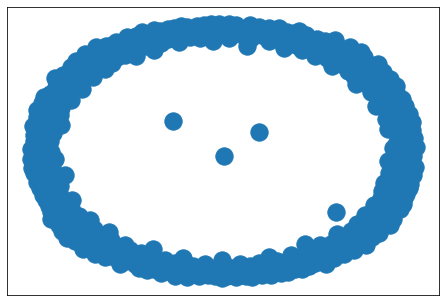

In [69]:
nx.draw(tc_g)